# **Decision Tree and Random Forest**

This dataset is about kids with 'kyphosis'. An illness that happens on their back.

## **Libraries**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## **Dataset**

In [2]:
df = pd.read_csv('kyphosis.csv')

In [3]:
df.head()

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


## **EDA**

**Pairplot for dataset**

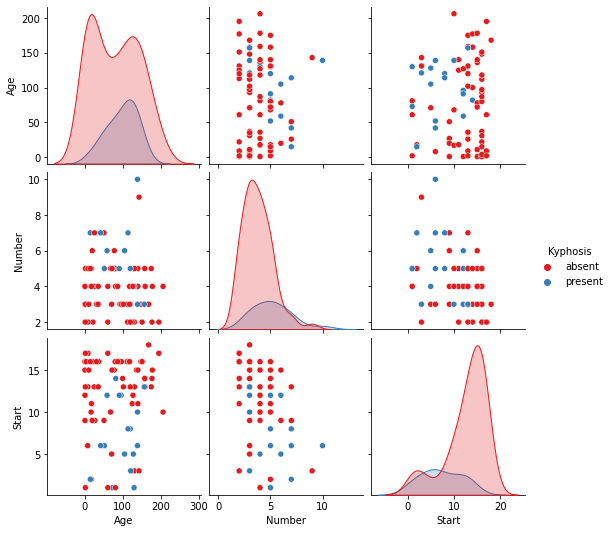

In [4]:
sns.pairplot(df,hue='Kyphosis',palette='Set1')

## **Training, Test Split**

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
X = df.drop('Kyphosis',axis=1)
y = df['Kyphosis']

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

## **Decision Tree**

Training only 1 tree

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
dtree = DecisionTreeClassifier()

In [11]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

## **Predicts and Evaluation**


In [12]:
predictions = dtree.predict(X_test)

In [13]:
from sklearn.metrics import classification_report,confusion_matrix

In [14]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

      absent       0.94      0.76      0.84        21
     present       0.38      0.75      0.50         4

    accuracy                           0.76        25
   macro avg       0.66      0.76      0.67        25
weighted avg       0.85      0.76      0.79        25



In [15]:
print(confusion_matrix(y_test,predictions))

[[16  5]
 [ 1  3]]


## Visualizing Tree

O Scikit learn possui alguns recursos de visualização incorporados para árvores de decisão. Você não usará isso com freqüência e requer que você instale a biblioteca pydot, mas aqui está um exemplo do código para executar isso:

In [16]:
from IPython.display import Image  
from sklearn.externals.six import StringIO  
from sklearn.tree import export_graphviz
import pydot 

features = list(df.columns[1:])
features

/usr/local/lib/python3.6/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


['Age', 'Number', 'Start']

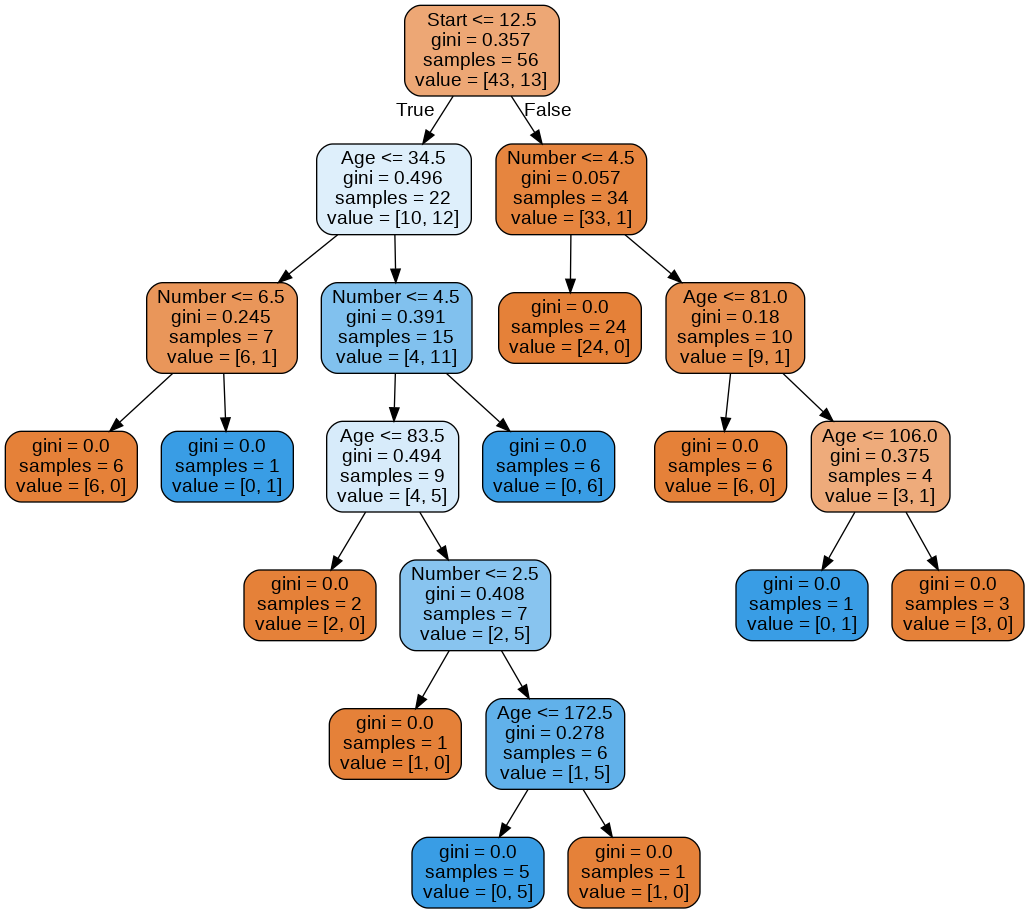

In [17]:
dot_data = StringIO()  
export_graphviz(dtree, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph[0].create_png())  

## **Random Forest**

Let's compare Random Forest with Decision Tree

In [18]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=200)
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=200,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [19]:
rfc_pred = rfc.predict(X_test)

In [20]:
print(confusion_matrix(y_test,rfc_pred))

[[16  5]
 [ 2  2]]


In [21]:
print(classification_report(y_test,rfc_pred))

              precision    recall  f1-score   support

      absent       0.89      0.76      0.82        21
     present       0.29      0.50      0.36         4

    accuracy                           0.72        25
   macro avg       0.59      0.63      0.59        25
weighted avg       0.79      0.72      0.75        25



        The Random Forest was a little worse than Decision Tree. But the Random Forest has a lower overfiting